# Lesson 01 - Jupyter Lab and Notebooks

## Using MarkDown to write text in JupyterLab

Markdown is simple language for writing formatted text. With it, you can easily write formated such as:

### Lists
Non-numbered list
* 1
    * 2
        * 3

Numbered list
1. Test
    1. Test
        1. Test

### Formated text
Make text *italiced*, __bold__ or __*both*__

### Lines
___
You can add a vertical lines by putting three underscores = ___ , on its own line.
____


### Tables

We can add simple tables. You can use this [website](https://www.tablesgenerator.com/markdown_tables) to create the markdown for you!

| Id | Label    | Price |
|--- |----------| ------|
| 01 | Markdown |\$1600 |
| 02 | is       |  \$12 |
| 03 | AWESOME  | \$999 |

### Mathematics

And write mathematics usin Latex. 

Euler's identity: $ e^{i \pi} + 1 = 0 $

To isolate and center the formulas and enter in math display mode, we use 2 dollars symbol:  

$$
f(n) = \begin{cases}
    n/2       & \quad \text{if } n \text{ is even} \\
    -(n+1)/2  & \quad \text{if } n \text{ is odd}
  \end{cases}
$$

But the easiest way to generate math is by using the Word equation editor and convert your math to a Latex expression:

$$
\log_b{a}=\ \frac{\log_d{a}}{\log_d{b}}
$$

### Include images

We can include images easily from a file:

![From the resources folder](resources/word_equation_editor.png)


Or from the web:

![From the web](https://apod.nasa.gov/apod/image/2204/LensedStar_Hubble_960.jpg)

## Executing Python scripts in Jupyter Lab

We don't need to use a terminal to execute python scripts. Infact, we can execute scripts directly in a notebook cell. Let's try it out! 

To run scripts we use built in Magic commands which always starts with the %-sign. To run scripts in a cell simply type %run followed by the location
of the scripts. In scripts/ we have a script that returns the fibonacci sequency by specifying the number of fibonacci terms.

In [1]:
%run scripts/fibonacci.py 10

0: 0
1: 1
2: 1
3: 2
4: 3
5: 5
6: 8
7: 13
8: 21
9: 34
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


Runnnings scripts can be very usefull for automating tedious tasks in the background. But, what if we want to use the results of the fibonacci script? Then we
can import the function from the script file.

There are many different magic functions. You can list them by writing %lsmagic in a cell and executing the cell.

In [16]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

## Import functions from a script

In [30]:
from scripts import fibonacci as fb  # The as fb is simply a short cut se we can refer to the fibonacci script by typing fb instead of fibonacci.

In [31]:
results = fb.fibonacci(5, print_stmt=False)  # We store the results in the variable "results"

In [32]:
results

[0, 1, 1, 2, 3, 5]

## Loading data into JupyterLab

### Loading CSV files

Loading data into jupyter lab most often involves Pandas. With Pandas we can read many different file formats
such as excel and csv files. Let's try to load the Entsoe file found in __Resources__

In [15]:
%matplotlib widget
import pandas as pd

In [16]:
df_csv = pd.read_csv("resources/Actual Generation per Production Type_202204040000-202204050000.csv")
df_csv.index = pd.date_range(start="2022-04-04 00:00", end="2022-04-04 23:45", freq="15min")

### Plotting data in JupyterLab

We plot data in Jupyter lab by using one of pythons many plotting libraries. Here we use Pandas internal plotting tools.
It is super easy to quickly plot data!

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

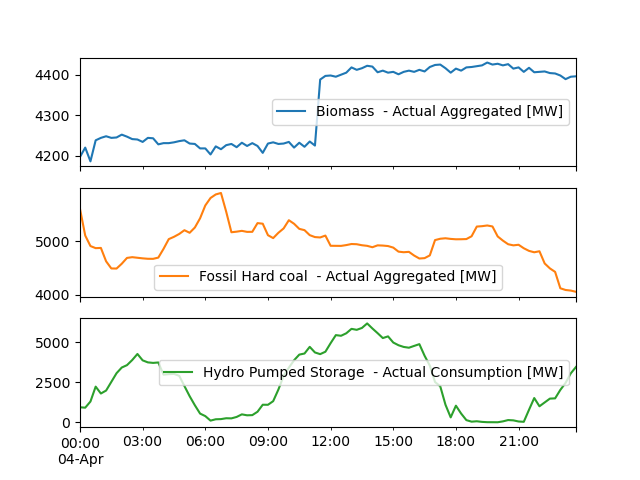

In [17]:
df_csv.plot(
    y=[2, 6, 12], subplots=True
)  # The [2, 6, 12] refers to a list of column numbers to use on the y-axis. Try changing the numbers and re-run the cell!

## Opening and reading Excel files from JupyterLab

It is simple to open Excel from jupyterlab. We can use xlwings to do that.

In [9]:
import xlwings as xw  # We import xlwings as xw

Now we simply use xw.Book() and gives it the path to the excel file we want to open.

In [8]:
xl = xw.Book("resources/Actual Generation per Production Type_202204040000-202204050000.xlsx")

Lets load the data into JupyterLab! AS the excelfile is now open we simply call xw.load() and assign it to a variable we name df.

In [25]:
df = xw.load(index=2)
df.index  = pd.date_range(start="2022-04-04 00:00", end="2022-04-04 23:45", freq="15min")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

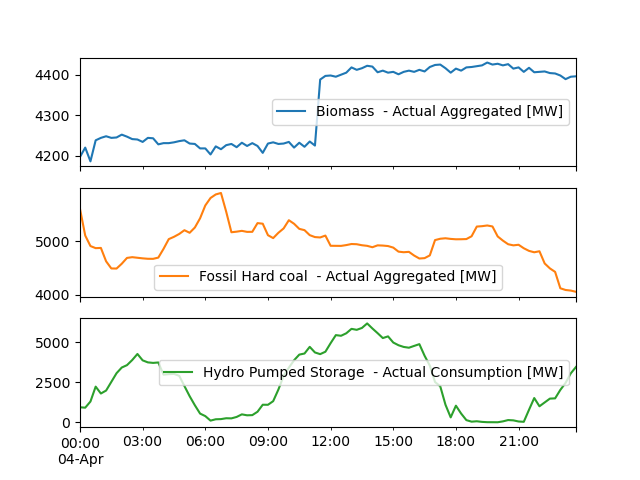

In [26]:
df.plot(
    y=[0, 4, 10], subplots=True
) 

In [27]:
df

,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Geothermal - Actual Aggregated [MW],Hydro Pumped Storage - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
2022-04-04 00:00:00,4197.0,12686.0,n/e,3790.0,5600.0,301.0,n/e,n/e,21.0,673.0,...,1001.0,30.0,n/e,3998.0,293.0,114.0,0.0,858.0,5044.0,17748.0
2022-04-04 00:15:00,4220.0,12758.0,n/e,3667.0,5105.0,293.0,n/e,n/e,21.0,476.0,...,1004.0,28.0,n/e,4008.0,293.0,114.0,0.0,872.0,4909.0,17792.0
2022-04-04 00:30:00,4186.0,12735.0,n/e,3722.0,4909.0,293.0,n/e,n/e,21.0,136.0,...,993.0,24.0,n/e,4001.0,293.0,114.0,0.0,860.0,4977.0,18264.0
2022-04-04 00:45:00,4238.0,12662.0,n/e,3882.0,4870.0,293.0,n/e,n/e,21.0,76.0,...,1008.0,17.0,n/e,4004.0,293.0,114.0,0.0,874.0,5042.0,18584.0
2022-04-04 01:00:00,4244.0,12447.0,n/e,3841.0,4874.0,293.0,n/e,n/e,21.0,71.0,...,1014.0,36.0,n/e,4069.0,288.0,114.0,0.0,864.0,5144.0,18882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04 22:45:00,4403.0,6951.0,n/e,4408.0,4428.0,293.0,n/e,n/e,21.0,181.0,...,995.0,40.0,n/e,4088.0,291.0,116.0,0.0,849.0,3103.0,36836.0
2022-04-04 23:00:00,4398.0,6958.0,n/e,4040.0,4123.0,293.0,n/e,n/e,21.0,142.0,...,998.0,34.0,n/e,4089.0,283.0,113.0,0.0,864.0,3328.0,36233.0
2022-04-04 23:15:00,4389.0,6865.0,n/e,4042.0,4091.0,293.0,n/e,n/e,21.0,110.0,...,991.0,42.0,n/e,4087.0,284.0,113.0,0.0,869.0,3285.0,36250.0
2022-04-04 23:30:00,4395.0,6853.0,n/e,4069.0,4080.0,293.0,n/e,n/e,21.0,70.0,...,1001.0,60.0,n/e,4084.0,284.0,113.0,0.0,865.0,3232.0,35747.0
